# General Classes

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import tqdm

class Video(cv2.VideoCapture):
    def __init__(self, path):
        assert isinstance(path, str), "path must  be a string";
        super().__init__(path)
        self.fps = self.get(cv2.CAP_PROP_FPS)
        self.num_frames = int(self.get(cv2.CAP_PROP_FRAME_COUNT))

    def goto_frame(self, idx: int):
        """Seek to frame <idx> and return (success, frame)."""
        self.set(cv2.CAP_PROP_POS_FRAMES, idx)
        return self.read()

    def __del__(self):
        self.release()

class Detector(object):
    def __init__(self, name, direction, row_range, col_range, threshold=50000, color='blue'):
        self.name = name 
        self.direction = direction
        self.row_start, self.row_end = row_range
        self.col_start, self.col_end = col_range 
        self.threshold = threshold
        self.color = color

    @property
    def number_of_peaks(self):
        return len(self.cool_frames)

    def read_cap(self, video_path):
        self.video = Video(video_path)
  
    def find_indecies_above_threshold(self):
        current_sum = []
        cool_frames = []
        self.video.set(cv2.CAP_PROP_POS_FRAMES, 0)
        for frame_idx in range(self.video.num_frames):
            ret, frame_bgr = self.video.read()
            if not ret:
                break

            frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
            red_channel = frame_rgb[:, :, 0]
            roi = red_channel[self.row_start:self.row_end + 1, self.col_start:self.col_end + 1]
            sum_val = int(np.sum(roi))
            current_sum.append(sum_val)
        
        current_sum = np.array(current_sum)
        current_sum = current_sum / current_sum.max()
        min_sum = min(current_sum)
        current_sum -= min_sum
        cool_frames = [i for i, sum in enumerate(current_sum) if sum >= self.threshold]
        real_cool_frames = []
        if cool_frames:
            real_cool_frames = [cool_frames[0]]
            for frame_idx in cool_frames[1:]:
                if not (frame_idx - 10 <= real_cool_frames[-1]):
                    real_cool_frames.append(frame_idx)
                
        self.current_sum = current_sum
        self.cool_frames = real_cool_frames 
        print(f"{self.name}, number of cool frames {len(real_cool_frames)}")

    def plot_current_sum(self):
        fig, ax = plt.subplots()
        ax.axhline(y=self.threshold, color='r', linestyle='--', linewidth=2)
        ax.plot(self.current_sum, color=self.color)
        ax.set_xlabel("Frame number")
        ax.set_ylabel("Red channel sum")
        ax.set_title(f"{self.name} - {self.direction}")
        fig.tight_layout()
        plt.show()


    def show_cool_frames(self):
        assert self.cool_frames, "cool_frames empty"
        current = 0 
        while True:
            ret, frame = self.video.goto_frame(current)

            if not ret:
                print(f"Could not read frame {current}")
                break

            cv2.putText(frame, f"{self.name} - {self.direction} {current}/{self.video.num_frames}", (20, 40), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2, cv2.LINE_AA,)

            cv2.rectangle(frame, (self.col_start, self.row_start), (self.col_end, self.row_end), color=(255, 0, 0), thickness=3)
            cv2.imshow("some title", frame)
            key = cv2.waitKey(0) & 0xFF

            if key in (ord("q"), 27):
                break
            elif key in (ord("n"), ord(" "), 83):
                if current < self.video.num_frames - 1:
                    current += 1
            elif key in (ord("p"), 81):
                if current > 0:
                    current -= 1

            elif key == (ord("s")):
                if current < self.video.num_frames - 1:
                    current += 1
                    while current not in self.cool_frames and current < self.video.num_frames -1:
                        current += 1

            elif key == (ord("a")):
                if current > 0:
                    current -= 1
                    while current not in self.cool_frames and current > 0:
                        current -=1  






# Analysis part A + B

In [ ]:
print("Starting analysis")
video_path = # enter video folder here
alice_h = Detector(("Alice"), "h", (460, 570), (965, 1150), threshold=0.65, color='green')
alice_v = Detector(("Alice"), "v", (130, 240), (965, 1150), threshold=0.65)
bob_h = Detector(("Bob"), "h", (510, 620), (545, 730), threshold=0.65)
bob_v = Detector(("Bob"), "v", (130, 240), (545, 730), threshold=0.65)
people = [alice_h, alice_v, bob_h, bob_v]

for person in people:
    person.read_cap(video_path)
    person.find_indecies_above_threshold()
    print(f"{person.name} {person.direction} - {person.cool_frames}")

print(f"alice_h: {alice_h.number_of_peaks} bob_h: {bob_h.number_of_peaks}")
print(f"alice_v: {alice_v.number_of_peaks} bob_v: {bob_v.number_of_peaks}")
N = alice_h.number_of_peaks + alice_v.number_of_peaks + bob_h.number_of_peaks + bob_v.number_of_peaks
N_hhhh = (alice_h.number_of_peaks + bob_h.number_of_peaks) / N
N_vvvv = (alice_v.number_of_peaks + bob_v.number_of_peaks) / N
print(f"N_hhhh {N_hhhh:.3f}, N_vvvv {N_vvvv:.3f}")

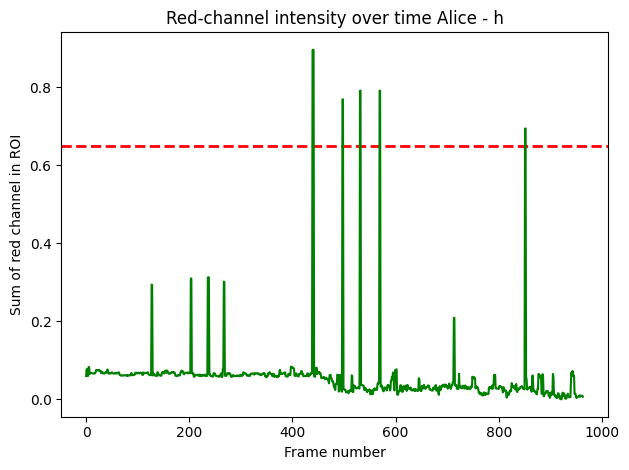

In [6]:
bob_v.plot_current_sum()
bob_h.plot_current_sum()
alice_v.plot_current_sum()
alice_h.plot_current_sum()


# Analysis part C

In [ ]:
#mapping between angles and video number
angle_mapping = {}
angle_mapping["a"] = {}
angle_mapping["a"]["b"] = 1
angle_mapping["a"]["bt"] = 2
angle_mapping["a"]['b_perp'] = 3
angle_mapping["a"]["bt_perp"] = 4

angle_mapping["at"] = {} 
angle_mapping["at"]["bt_perp"] = 5
angle_mapping["at"]["b_perp"] = 6
angle_mapping["at"]["bt"] = 7
angle_mapping["at"]["b"] = 8

angle_mapping["a_perp"] = {}
angle_mapping["a_perp"]["b"] = 9
angle_mapping["a_perp"]["bt"] = 10
angle_mapping["a_perp"]["b_perp"] = 11
angle_mapping["a_perp"]["bt_perp"] = 12

angle_mapping["at_perp"] = {}
angle_mapping["at_perp"]["bt_perp"] = 13
angle_mapping["at_perp"]["b_perp"] = 14
angle_mapping["at_perp"]["bt"] = 15
angle_mapping["at_perp"]["b"] = 16



In [ ]:
N = []

N.append(-99)
bobs = []
alices = []
for i in tqdm.tqdm(range(16)):
    video_path = rf"C:\Users\noa11\OneDrive\Desktop\studies\semester6\tomograhpy\partC\B{i+1}.mp4"
    bob = Detector((f"Bob{i + 1}"), "up", (200, 260), (1040, 1100), threshold=0.875, color="blue")
    alice = Detector((f"Alice{i + 1}"), "up", (130, 190), (600, 660), threshold=0.875, color="red")
    bob.read_cap(video_path)
    alice.read_cap(video_path)
    bob.find_indecies_above_threshold()
    alice.find_indecies_above_threshold()
    N.append(bob.number_of_peaks + alice.number_of_peaks)
    bobs.append(bob)
    alices.append(alice)

print(N)

E_a_b = ((N[angle_mapping["a"]["b"]]+N[angle_mapping["a_perp"]["b_perp"]]-N[angle_mapping["a"]["b_perp"]]-N[angle_mapping["a_perp"]["b"]]) /
(N[angle_mapping["a"]["b"]]+N[angle_mapping["a_perp"]["b_perp"]]+N[angle_mapping["a_perp"]["b"]]+N[angle_mapping["a"]["b_perp"]]))

E_at_b = ((N[angle_mapping["at"]["b"]]+N[angle_mapping["at_perp"]["b_perp"]]-N[angle_mapping["at"]["b_perp"]]-N[angle_mapping["at_perp"]["b"]]) / 
(N[angle_mapping["at"]["b"]]+N[angle_mapping["at_perp"]["b_perp"]]+N[angle_mapping["at_perp"]["b"]]+N[angle_mapping["at"]["b_perp"]]))

E_a_bt = ((N[angle_mapping["a"]["bt"]]+N[angle_mapping["a_perp"]["bt_perp"]]-N[angle_mapping["a"]["bt_perp"]]-N[angle_mapping["a_perp"]["bt"]]) / 
(N[angle_mapping["a"]["bt"]]+N[angle_mapping["a_perp"]["bt_perp"]]+N[angle_mapping["a_perp"]["bt"]]+N[angle_mapping["a"]["bt_perp"]]))

E_at_bt = ((N[angle_mapping["at"]["bt"]]+N[angle_mapping["at_perp"]["bt_perp"]]-N[angle_mapping["at"]["bt_perp"]]-N[angle_mapping["at_perp"]["bt"]]) /
(N[angle_mapping["at"]["bt"]]+N[angle_mapping["at_perp"]["bt_perp"]]+N[angle_mapping["at_perp"]["bt"]]+N[angle_mapping["at"]["bt_perp"]]))

S= E_a_b + E_at_bt + E_at_b - E_a_bt 
print(f"S is: {S}")

    


In [ ]:

print(E_a_b)
print(E_at_bt)
print(E_a_bt)
print(E_at_b)


In [ ]:
E_a_b_numerator = (N[angle_mapping["a"]["b"]]+N[angle_mapping["a_perp"]["b_perp"]]-N[angle_mapping["a"]["b_perp"]]-N[angle_mapping["a_perp"]["b"]])
E_a_b_denominator = (N[angle_mapping["a"]["b"]]+N[angle_mapping["a_perp"]["b_perp"]]+N[angle_mapping["a"]["b_perp"]]+N[angle_mapping["a_perp"]["b"]])
E_at_b_numerator = (N[angle_mapping["at"]["b"]]+N[angle_mapping["at_perp"]["b_perp"]]-N[angle_mapping["at"]["b_perp"]]-N[angle_mapping["at_perp"]["b"]])
E_at_b_denominator = (N[angle_mapping["at"]["b"]]+N[angle_mapping["at_perp"]["b_perp"]]+N[angle_mapping["at"]["b_perp"]]+N[angle_mapping["at_perp"]["b"]])

E_a_bt_numerator = (N[angle_mapping["a"]["bt"]]+N[angle_mapping["a_perp"]["bt_perp"]]-N[angle_mapping["a"]["bt_perp"]]-N[angle_mapping["a_perp"]["bt"]])
E_a_bt_denominator = (N[angle_mapping["a"]["bt"]]+N[angle_mapping["a_perp"]["bt_perp"]]+N[angle_mapping["a"]["bt_perp"]]+N[angle_mapping["a_perp"]["bt"]])
E_at_bt_numerator = (N[angle_mapping["at"]["bt"]]+N[angle_mapping["at_perp"]["bt_perp"]]-N[angle_mapping["at"]["bt_perp"]]-N[angle_mapping["at_perp"]["bt"]])
E_at_bt_denominator = (N[angle_mapping["at"]["bt"]]+N[angle_mapping["at_perp"]["bt_perp"]]+N[angle_mapping["at"]["bt_perp"]]+N[angle_mapping["at_perp"]["bt"]])

ds = []
ds.append((np.sqrt(N[1])*((2*(E_a_b_numerator-N[1]-N[11]))/E_a_b_denominator**2))**2)
ds.append((np.sqrt(N[2])*((2*(E_a_bt_numerator-N[2]-N[12]))/E_a_bt_denominator**2))**2)
ds.append((np.sqrt(N[3])*((2*(E_a_b_numerator-N[3]-N[9]))/E_a_b_denominator**2))**2)
ds.append((np.sqrt(N[4])*((2*(E_a_bt_numerator-N[4]-N[10]))/E_a_bt_denominator**2))**2)
ds.append((np.sqrt(N[5])*((2*(E_at_bt_numerator-N[5]-N[15]))/E_at_bt_denominator**2))**2)
ds.append((np.sqrt(N[6])*((2*(E_at_b_numerator-N[6]-N[16]))/E_at_b_denominator**2))**2)
ds.append((np.sqrt(N[7])*((2*(E_at_bt_numerator-N[7]-N[13]))/E_at_bt_denominator**2))**2)
ds.append((np.sqrt(N[8])*((2*(E_at_b_numerator-N[8]-N[14]))/E_at_b_denominator**2))**2)
ds.append((np.sqrt(N[9])*((2*(E_a_b_numerator-N[9]-N[3]))/E_a_b_denominator**2))**2)
ds.append((np.sqrt(N[10])*((2*(E_a_bt_numerator-N[10]-N[4]))/E_a_bt_denominator**2))**2)
ds.append((np.sqrt(N[11])*((2*(E_a_b_numerator-N[11]-N[1]))/E_a_b_denominator**2))**2)
ds.append((np.sqrt(N[12])*((2*(E_a_bt_numerator-N[12]-N[2]))/E_a_bt_denominator**2))**2)
ds.append((np.sqrt(N[13])*((2*(E_at_bt_numerator-N[13]-N[7]))/E_at_bt_denominator**2))**2)
ds.append((np.sqrt(N[14])*((2*(E_at_b_numerator-N[14]-N[8]))/E_at_b_denominator**2))**2)
ds.append((np.sqrt(N[15])*((2*(E_at_bt_numerator-N[15]-N[5]))/E_at_bt_denominator**2))**2)
ds.append((np.sqrt(N[16])*((2*(E_at_b_numerator-N[16]-N[6]))/E_at_b_denominator**2))**2)


ds_final = np.sqrt(sum(ds))
print (ds_final)


In [ ]:
bob = Detector("bob", "up", (200, 260), (1040, 1100), threshold=37000)
alice = Detector("alice", "up", (130, 190), (600, 660), threshold=135000)
people = [alice, bob]
for person in people:
    person.read_cap(rf"C:\Users\noa11\OneDrive\Desktop\studies\semester6\tomograhpy\partC\B1.mp4")
    person.find_indecies_above_threshold()
    person.plot_current_sum()



In [ ]:
#angle definitions
real_angle_bob = {
    'b': -22.5,
    'bt': 22.5,
    'b_perp': 67.5,
    'bt_perp': 112.5
}
real_angle_alice = {
    'a': -45,
    'at': 0,
    'a_perp': 45,
    'at_perp': 90
}

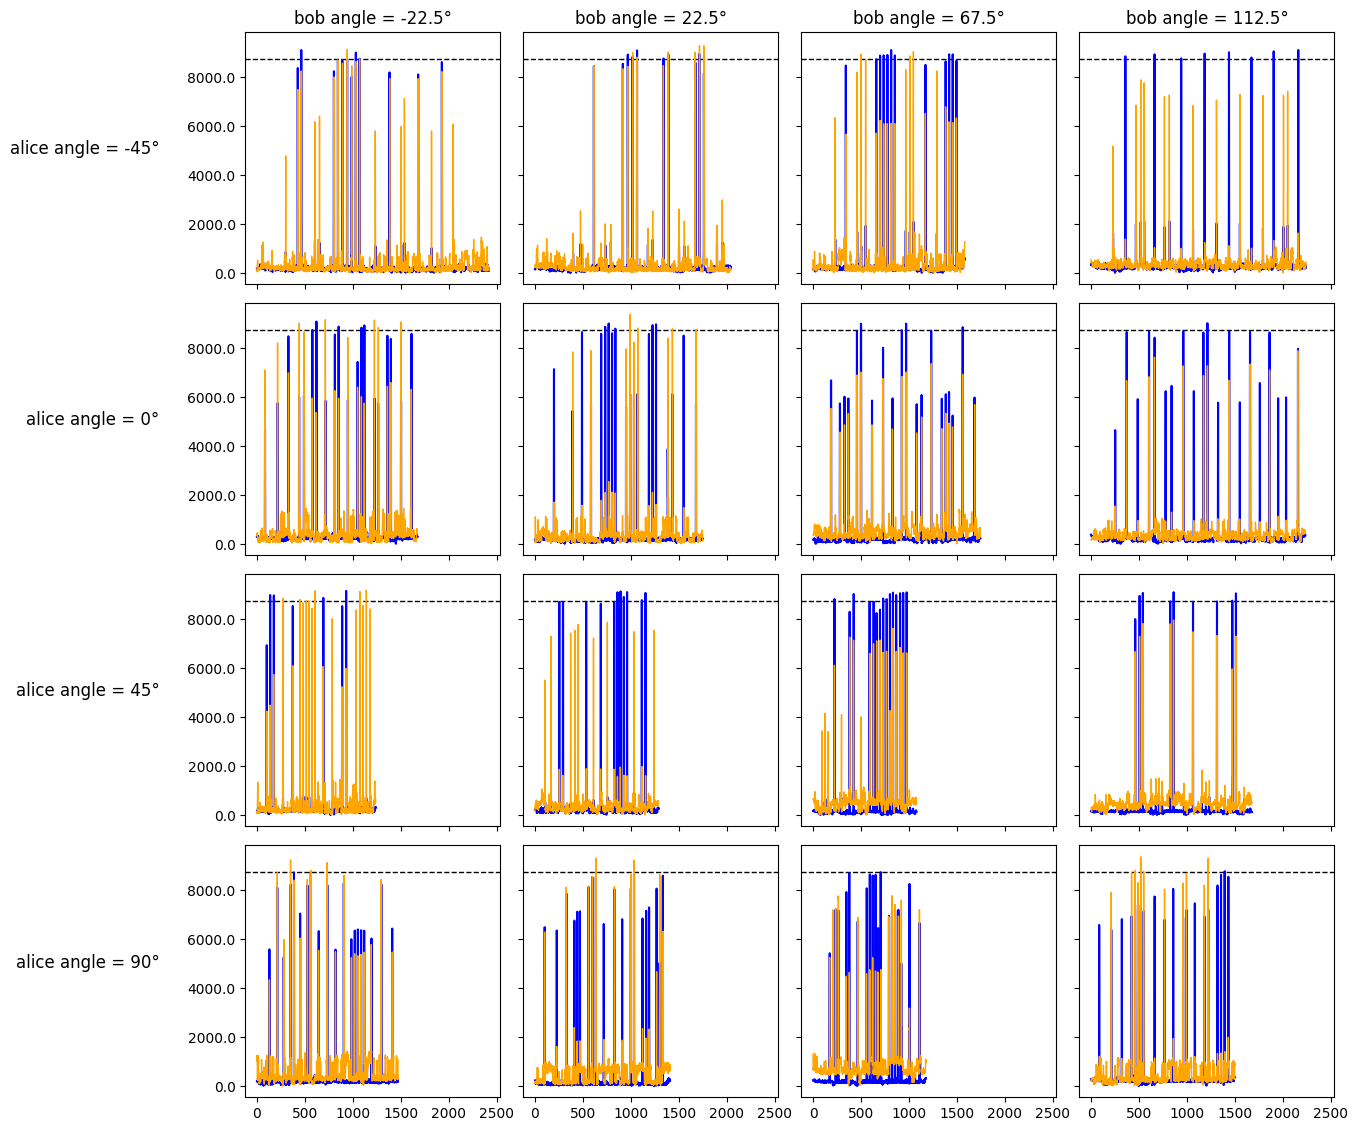

In [13]:
a_values = ["a", 'at', 'a_perp', 'at_perp']
b_values = ["b", 'bt', 'b_perp', 'bt_perp']

fig, axes = plt.subplots(4, 4, figsize=(12, 12), sharex=True, sharey=True)

for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        ax = axes[i,j]
        ax.axhline(y=alices[0].threshold, color='black', linestyle='--', linewidth=1)
        ax.plot(alices[angle_mapping[a][b]-1].current_sum, color='blue')
        ax.plot(bobs[angle_mapping[a][b]-1].current_sum, color='orange', linewidth=1 )
        fig.tight_layout()
        y_formatter = ticker.FuncFormatter(lambda val, pos: f"{val*10000:.1f}")

        ax.yaxis.set_major_formatter(y_formatter)
          
        if i == 0:
            ax.set_title(f'bob angle = {real_angle_bob[b]}\u00B0', fontsize=12)

        if j == 0:
            ax.set_ylabel(f'alice angle = {real_angle_alice[a]}\u00B0', fontsize=12, rotation=0, labelpad=20, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.92, left=0.08)
#plt.suptitle('Plots combinations', fontsize=16)
plt.savefig("sine_wave_tight.png", bbox_inches="tight")
plt.show()
